In [3]:
import carla
import random
from carla_birdeye_view import BirdViewProducer, BirdViewCropType, PixelDimensions

In [4]:
# Connect to the client and retrieve the world object
client = carla.Client('localhost', 2000)
world = client.get_world()
client.load_world('Town01')

In [5]:
ego_bp = world.get_blueprint_library().find('vehicle.dodge.charger_2020')
ego_bp.set_attribute('role_name','ego')

In [6]:
spawn_points = world.get_map().get_spawn_points()
number_of_spawn_points = len(spawn_points)
if 0 < number_of_spawn_points:
    random.shuffle(spawn_points)
    ego_transform = spawn_points[0]
    ego_vehicle = world.spawn_actor(ego_bp,ego_transform)
    print('\nEgo is spawned')
else: 
    logging.warning('Could not found any spawn points')


Ego is spawned


In [7]:
spectator = world.get_spectator()
world_snapshot = world.wait_for_tick() 
spectator.set_transform(ego_vehicle.get_transform())

In [6]:
def a_star_search(start_wp, end_wp, heuristic):
    open_set = set([start_wp])
    came_from = {}
    g_score = {start_wp: 0}
    f_score = {start_wp: heuristic(start_wp, end_wp)}
    
    while open_set:
        current = min(open_set, key=lambda wp: f_score[wp])
        
        if current == end_wp:
            return reconstruct_path(came_from, current)
        
        open_set.remove(current)
        for neighbor in current.next(2.0):  # 2 meters forward
            tentative_g_score = g_score[current] + distance(current, neighbor)
            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, end_wp)
                open_set.add(neighbor)
    
    return []

def heuristic(wp1, wp2):
    return wp1.transform.location.distance(wp2.transform.location)

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    total_path.reverse()
    return total_path

In [7]:
import random

def generate_random_route():
    map = world.get_map()
    waypoints = map.generate_waypoints(distance=20.0)  # Generate waypoints every 20 meters
    start_wp = random.choice(waypoints)
    end_wp = random.choice(waypoints)
    route = a_star_search(start_wp, end_wp, heuristic)
    return route

In [19]:
map = world.get_map()
waypoints = map.generate_waypoints(distance=20.0)  

In [13]:
map.next_until_lane_end(20.0)

AttributeError: 'Map' object has no attribute 'next_until_lane_end'

In [14]:
spawn_points = world.get_map().get_spawn_points()

In [17]:
# Nearest waypoint in the center of a Driving or Sidewalk lane.
waypoint01 = map.get_waypoint(ego_vehicle.get_location(),project_to_road=True, lane_type=(carla.LaneType.Driving | carla.LaneType.Sidewalk))
waypoint01

In [24]:
my_geolocation = map.transform_to_geolocation(ego_vehicle.transform)

AttributeError: 'Vehicle' object has no attribute 'transform'

In [25]:
info_map = map.to_opendrive()

In [13]:
from bird_view_manager import BirdviewSensor
import matplotlib.pyplot as plt

In [18]:
bevSensor = BirdviewSensor(world, 400, 40, ego_vehicle)

In [19]:
data = bevSensor.get_data()

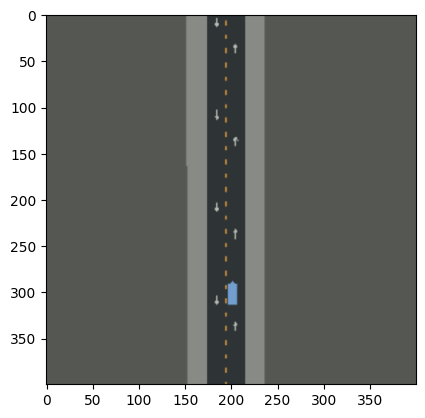

In [20]:
plt.imshow(data)

In [21]:
bevSensor.render_actors()

TypeError: render_actors() missing 2 required positional arguments: 'surface' and 'angle'